# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [20]:
# Dependencies and Setup
try:
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    import requests
    import time
    import datetime
    import pprint
    import scipy.stats as st
    from scipy.stats import linregress
    import sys, os
   
    sys.path.append(os.path.realpath('..'))
    # Incorporated citipy to determine city based on latitude and longitude
    from citipy import citipy
    #import citypy run: pip install citipy
    
    # Import API keys
    sys.path.append('..\\apikeys')
    from api_keys import weather_api_key
    
    from my_func import lregression
    
    
except Exception as e:
    print(f"a module(s) have not been imported {e}" )

# Output File (CSV)
output_data_file = "output_data/cities.csv"
#print(sys.path)
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [42]:
from my_func import lregression

## Generate Cities List

In [21]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

In [22]:
import pprint
pprint.pp(cities)

['oxford',
 'rikitea',
 'iqaluit',
 'xining',
 'fare',
 'mys shmidta',
 'ossora',
 'pangnirtung',
 'edd',
 'bukama',
 'acapulco',
 'hobart',
 'poum',
 'komsomolskiy',
 'beaune',
 'nuevo progreso',
 'do gonbadan',
 'satitoa',
 'mana',
 'albany',
 'punta arenas',
 'guerrero negro',
 'khatanga',
 'acarau',
 'inhuma',
 'mahebourg',
 'turka',
 'puerto ayora',
 'cherskiy',
 'broken hill',
 'saint-augustin',
 'nizhneyansk',
 'kapaa',
 'erenhot',
 'havre-saint-pierre',
 'thinadhoo',
 'sao filipe',
 'naryan-mar',
 'kijang',
 'louisbourg',
 'bluff',
 'vaini',
 'barrow',
 'yellowknife',
 'dharchula',
 'korla',
 'taolanaro',
 'busselton',
 'butaritari',
 'mataura',
 'prieska',
 'santa cruz',
 'madhogarh',
 'grand river south east',
 'ushuaia',
 'touros',
 'klaksvik',
 'ponta do sol',
 'port alfred',
 'adrar',
 'karratha',
 'new norfolk',
 'progreso',
 'saldanha',
 'port elizabeth',
 'upernavik',
 'thompson',
 'chimbote',
 'samarai',
 'mar del plata',
 'upata',
 'kruisfontein',
 'bredasdorp',
 'mou

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
#units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)
qjson = requests.get(f'{query_url}san diego').json()

pprint.pp(qjson)

http://api.openweathermap.org/data/2.5/weather?appid=2bf09c264630bd0a49d6d608d5307394&units=metric&q=
{'coord': {'lon': -117.16, 'lat': 32.72},
 'weather': [{'id': 803,
              'main': 'Clouds',
              'description': 'broken clouds',
              'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 11.68,
          'feels_like': 10.45,
          'temp_min': 10.56,
          'temp_max': 13,
          'pressure': 1024,
          'humidity': 82},
 'visibility': 10000,
 'wind': {'speed': 1.34, 'deg': 288},
 'clouds': {'all': 75},
 'dt': 1609648679,
 'sys': {'type': 1,
         'id': 5771,
         'country': 'US',
         'sunrise': 1609599069,
         'sunset': 1609635255},
 'timezone': -28800,
 'id': 5391811,
 'name': 'San Diego',
 'cod': 200}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [51]:
#Create lists to capture our data
lat = []
lng = []
maxtemp = []
humidity = []
cloudiness = []
windspeed= []
country = []
list_cities = []
date = []


In [52]:
# start appending data into lists
i = 0
totcities =0
iset=1
city_missing = []
missctycnt = 0
print(f"Beginning data Retrieval")
print("---------------------------------------")
for x in cities:
    response = requests.get(query_url + x).json()
    
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
                
        list_cities.append(x)
        i +=1
        totcities += 1
        if i == 50:
            iset += 1
            i = 0
            
        print(f"i count: {i} of Set {iset} | {x}") # should have a total of 624 cities count
    except :
        print (f"unable to find city '{x}'' skipping")
        city_missing.append(x) #add cities that were not found
        missctycnt +=1 #count Missing cities
        pass

print("---------------------------------------")
print("Data Retrieval Complete")    
print("---------------------------------------")
print("Review city count | make sure cities are matching")
print(f"Total cities in list: {totcities}")
print(f"Total missing lists: {missctycnt}")

Beginning data Retrieval
---------------------------------------
i count: 1 of Set 1 | oxford
i count: 2 of Set 1 | rikitea
i count: 3 of Set 1 | iqaluit
i count: 4 of Set 1 | xining
i count: 5 of Set 1 | fare
unable to find city 'mys shmidta' skipping
i count: 6 of Set 1 | ossora
i count: 7 of Set 1 | pangnirtung
i count: 8 of Set 1 | edd
i count: 9 of Set 1 | bukama
i count: 10 of Set 1 | acapulco
i count: 11 of Set 1 | hobart
i count: 12 of Set 1 | poum
i count: 13 of Set 1 | komsomolskiy
i count: 14 of Set 1 | beaune
i count: 15 of Set 1 | nuevo progreso
i count: 16 of Set 1 | do gonbadan
unable to find city 'satitoa' skipping
i count: 17 of Set 1 | mana
i count: 18 of Set 1 | albany
i count: 19 of Set 1 | punta arenas
i count: 20 of Set 1 | guerrero negro
i count: 21 of Set 1 | khatanga
i count: 22 of Set 1 | acarau
i count: 23 of Set 1 | inhuma
i count: 24 of Set 1 | mahebourg
i count: 25 of Set 1 | turka
i count: 26 of Set 1 | puerto ayora
i count: 27 of Set 1 | cherskiy
i count

i count: 30 of Set 5 | salalah
i count: 31 of Set 5 | tanabe
i count: 32 of Set 5 | college
i count: 33 of Set 5 | ust-kut
i count: 34 of Set 5 | chokurdakh
i count: 35 of Set 5 | umea
i count: 36 of Set 5 | lulea
unable to find city 'tsienyane' skipping
i count: 37 of Set 5 | cabo san lucas
i count: 38 of Set 5 | bushehr
i count: 39 of Set 5 | olafsvik
i count: 40 of Set 5 | bethel
i count: 41 of Set 5 | liancheng
i count: 42 of Set 5 | oranjemund
i count: 43 of Set 5 | mayo
unable to find city 'samusu' skipping
i count: 44 of Set 5 | rosarito
i count: 45 of Set 5 | duku
i count: 46 of Set 5 | ostrovnoy
i count: 47 of Set 5 | jawhar
unable to find city 'dzhusaly' skipping
i count: 48 of Set 5 | wattegama
i count: 49 of Set 5 | dudinka
i count: 0 of Set 6 | wajima
i count: 1 of Set 6 | pedana
i count: 2 of Set 6 | takoradi
i count: 3 of Set 6 | tuatapere
i count: 4 of Set 6 | redcliffe
i count: 5 of Set 6 | nuuk
i count: 6 of Set 6 | kozlovo
i count: 7 of Set 6 | socorro
i count: 8 of 

i count: 10 of Set 10 | wanaka
i count: 11 of Set 10 | puerto escondido
i count: 12 of Set 10 | mabaruma
i count: 13 of Set 10 | salinopolis
i count: 14 of Set 10 | coahuayana
i count: 15 of Set 10 | norman wells
i count: 16 of Set 10 | alekseyevsk
i count: 17 of Set 10 | saskylakh
i count: 18 of Set 10 | atasu
i count: 19 of Set 10 | port blair
i count: 20 of Set 10 | tomatlan
i count: 21 of Set 10 | saint-francois
i count: 22 of Set 10 | kibala
i count: 23 of Set 10 | yamada
i count: 24 of Set 10 | dalvik
i count: 25 of Set 10 | souillac
i count: 26 of Set 10 | tapes
i count: 27 of Set 10 | lappeenranta
i count: 28 of Set 10 | venice
i count: 29 of Set 10 | pedro juan caballero
i count: 30 of Set 10 | londoko
i count: 31 of Set 10 | benghazi
i count: 32 of Set 10 | zonguldak
i count: 33 of Set 10 | penzance
i count: 34 of Set 10 | prince rupert
i count: 35 of Set 10 | ila
i count: 36 of Set 10 | neiafu
i count: 37 of Set 10 | puerto madryn
i count: 38 of Set 10 | balkanabat
i count: 

In [53]:
#capture data into a dataframe to reuse
cityall_df = pd.DataFrame({'City': list_cities,
                           'Lat': lat,
                           'Lng': lng,
                           'Max Temp': maxtemp,
                           'Humidity': humidity,
                           'Cloudiness': cloudiness,
                           'Wind Speed': windspeed,
                           'Country': country,
                           'Date': date
                          
                          } )

cityall_df.head()
cityall_df.to_csv(output_data_file)

In [54]:
cityall_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,oxford,51.75,-1.26,2.00,93,99,1.50,GB,1609650345
1,rikitea,-23.12,-134.97,26.10,70,27,4.18,PF,1609650345
2,iqaluit,63.75,-68.51,-22.00,76,40,1.50,CA,1609650346
3,xining,36.62,101.77,-5.24,60,0,1.72,CN,1609650346
4,fare,-16.70,-151.02,27.08,77,2,8.07,PF,1609650346


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [55]:
cityhumidity = cityall_df.loc[cityall_df['Humidity']>100,:]
print(f"Total cities where the humidity is over 100% {cityhumidity['City'].count()}")

Total cities where the humidity is over 100% 0


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [56]:
from datetime import date
today = date.today()

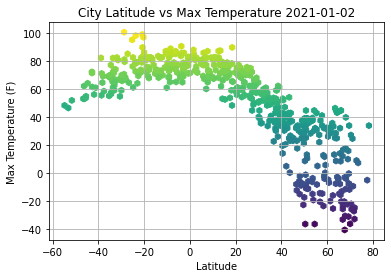

In [57]:
#Plot for latitude vs temperature. Convert max temperature from C to F degrees
x = cityall_df['Lat']
#(Celsius * 9/5) + 32
y = (cityall_df['Max Temp']*9/5)+32
plt.scatter(x,y, c=y, marker='h')
plt.grid()
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.title(f'City Latitude vs Max Temperature {today}')


plt.savefig(f'output_data/lat_vs_temperature_{today}.png')
plt.show()

## Latitude vs. Humidity Plot

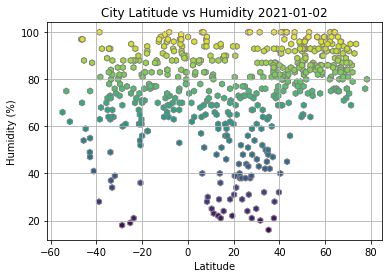

In [58]:
#Plot for latitude vs Humidity.
x = cityall_df['Lat']
y = cityall_df['Humidity']
plt.scatter(x,y, c=y, marker='h', edgecolor='grey')
plt.grid()
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title(f'City Latitude vs Humidity {today}')

plt.savefig(f'output_data/lat_vs_humidity_{today}.png')
plt.show()

## Latitude vs. Cloudiness Plot

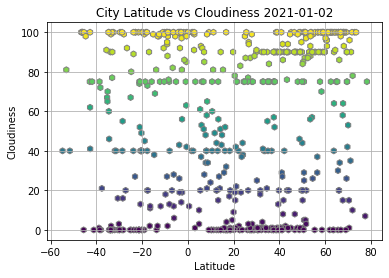

In [59]:
#Plot for latitude vs Humidity.
x = cityall_df['Lat']
y = cityall_df['Cloudiness']
plt.scatter(x,y, c=y, marker='h', edgecolor='grey')
plt.grid()
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.title(f'City Latitude vs Cloudiness {today}')

plt.savefig(f'output_data/lat_vs_cloudiness_{today}.png')
plt.show()

## Latitude vs. Wind Speed Plot

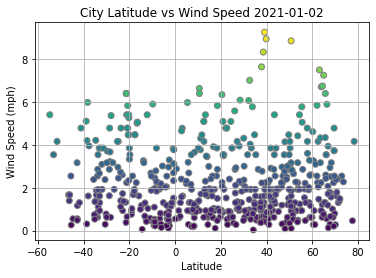

In [60]:
#Plot for latitude vs Wind. Convert KM to Miles for wind speed
x = cityall_df['Lat']
y = cityall_df['Wind Speed']/1.609
plt.scatter(x,y, c=y, marker='o', edgecolor='grey')
plt.grid()
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title(f'City Latitude vs Wind Speed {today}')

plt.savefig(f'output_data/lat_vs_windspeed_{today}.png')
plt.show()

## Linear Regression

In [119]:
#Realized this code was going to be used 8 times great use for a function

from scipy.stats import linregress
from scipy.stats import sem

def linr(x,y):
    
    # LinR
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    
    regression = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x, y)
    plt.plot(x , regression,"r-")

    #plt.annotate(line_eq,(20,40),fontsize=15,color="k")
    # Print r value
    print(f"The r-value is: {round(rvalue**2,6)}")
    plt.show()

The r-value is: 0.583949


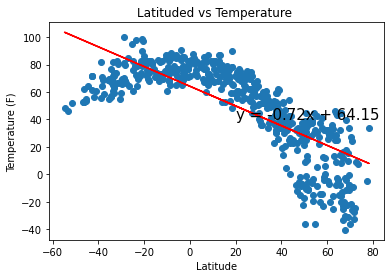

In [115]:
# Create a Scatter Plot for temperature vs latitude
x_values = cityall_df['Lat']
#(Celsius * 9/5) + 32
y_values = (cityall_df['Max Temp']*9/5)+32


plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Latituded vs Temperature ')
#call funciton linear regresion and plot v4vendetta

linr(x_values, y_values)

plt.show()

## Analysis
We can obserbe that cities thatre closer to the equator do have a higher temperateture vs cities that are away from the equator.   

y = -0.72x + 64.15
The r-value is: 0.583949


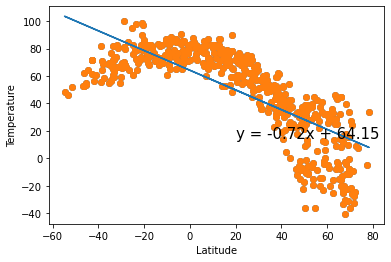

In [80]:
# Create a Scatter Plot for temperature vs latitude
# x_values = cityall_df['Lat']
# #(Celsius * 9/5) + 32
# y_values = (cityall_df['Max Temp']*9/5)+32
# plt.scatter(x_values,y_values)
# plt.xlabel('Latitude')
# plt.ylabel('Temperature')
# #plt.show()

# # Perform a linear regression on temperature vs. latitude
# (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# # Get regression values
# regress_values = x_values * slope + intercept
# #print(regress_values)

# # Create line equation string
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(line_eq)

# # Create Plot
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values)

# # Label plot and annotate the line equation
# plt.annotate(line_eq,(20,15),fontsize=15 )

# # Print r value
# print(f"The r-value is: {round(rvalue**2,6)}")

# # Show plot
# plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [66]:
cityall_df['Hemisphere'] =['Northern' if x>=0 else 'Southern' for x in cityall_df['Lat'] ]
cityall_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Hemisphere
0,oxford,51.75,-1.26,2.00,93,99,1.50,GB,1609650345,Northern
1,rikitea,-23.12,-134.97,26.10,70,27,4.18,PF,1609650345,Southern
2,iqaluit,63.75,-68.51,-22.00,76,40,1.50,CA,1609650346,Northern
3,xining,36.62,101.77,-5.24,60,0,1.72,CN,1609650346,Northern
4,fare,-16.70,-151.02,27.08,77,2,8.07,PF,1609650346,Southern
5,ossora,59.24,163.07,-14.62,93,100,4.20,RU,1609650346,Northern
6,pangnirtung,66.15,-65.71,-29.09,80,86,0.89,CA,1609650347,Northern
7,edd,13.93,41.69,26.34,40,21,5.55,ER,1609650347,Northern
8,bukama,-9.20,25.85,20.18,96,100,0.38,CD,1609650347,Southern
9,acapulco,16.86,-99.89,24.42,59,4,1.67,MX,1609650745,Northern


In [67]:
#cityall_df.head()
Northern = cityall_df.loc[cityall_df['Hemisphere']=='Northern']
Southern = cityall_df.loc[cityall_df['Hemisphere']=='Southern']

The r-value is: 0.713194


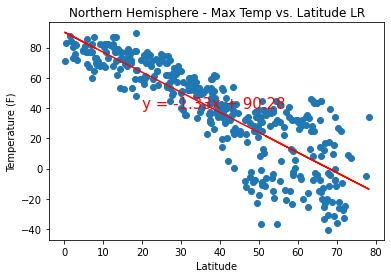

In [89]:
# Create a Scatter Plot for temperature vs latitude
x_values = Northern['Lat']
#(Celsius * 9/5) + 32
y_values = (Northern['Max Temp']*9/5)+32

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude LR')

#call funciton linear regresion and plot vfor vendetta
linr(x_values, y_values)

## Analysis
Cities in the northern hemisphere have that are closer to the equator have a higher temperature, and we can see that as the latidude is higher or closer to the north pole temperatures decrease.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.273888


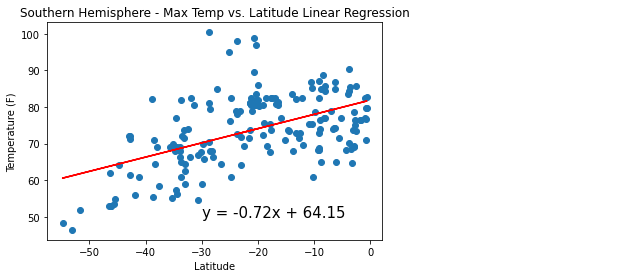

In [95]:
# Create a Scatter Plot for temperature vs latitude
x_values = Southern['Lat']
#(Celsius * 9/5) + 32
y_values = (Southern['Max Temp']*9/5)+32

# Create a Scatter Plot for temperature vs latitude
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.annotate(line_eq,(-30,50),fontsize=15 ) #
#call funciton linear regresion and plot vfor vendetta
linr(x_values, y_values)

## Analysis
Cities in the southern hemisphere have that are closer to the equator have a higher temperature, and we can see that as the latidude is lower or closer to the south pole temperatures decrease dramatically. in the southern hemisphere we notice a group of cities around lattidude -20. that have a temperature of 80 degrees

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.162057


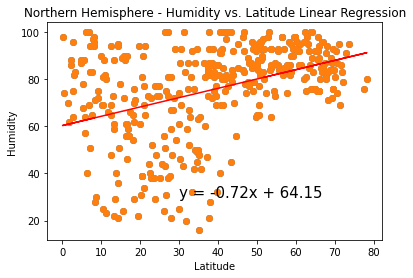

In [123]:
# Create a Scatter Plot for temperature vs latitude
x_values = Northern['Lat']
#(Celsius * 9/5) + 32
y_values = Northern['Humidity'] 
# Create a Scatter Plot for temperature vs latitude
plt.scatter(x_values,y_values)

# Create a Scatter Plot for temperature vs latitude
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')

plt.annotate(line_eq,(30,30),fontsize=15 )
#call funciton linear regresion and plot vfor vendetta
linr(x_values, y_values)

## Analysis
Cities in the northern hemisphere that are above the LR line have a higher humidity. Between latitude 40-60 we notice that its sparce. this is due to a few cities that are in deserts. While on the other side of the world in the EU we have a lot more tundras regions. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.082466


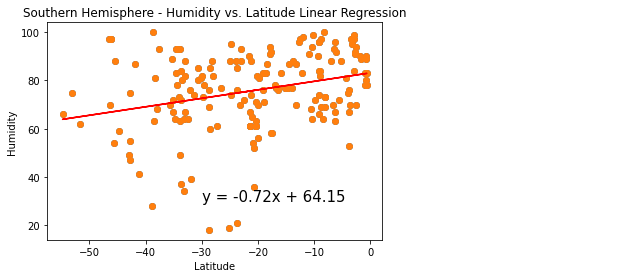

In [103]:
# Create a Scatter Plot for temperature vs latitude
x_values = Southern['Lat']
#(Celsius * 9/5) + 32
y_values = Southern['Humidity'] 
# Create a Scatter Plot for temperature vs latitude
plt.scatter(x_values,y_values)

# Create a Scatter Plot for temperature vs latitude
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')

plt.annotate(line_eq,(-30,30),fontsize=15 )
#call funciton linear regresion and plot vfor vendetta
linr(x_values, y_values)

## Analysis
As we decrease from the equator line we noticed a decreasing tendencies on cities where the humidity is higher. meaning that the lower we go on the southern hemisphere the humidity % can be as low as 10.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.087062


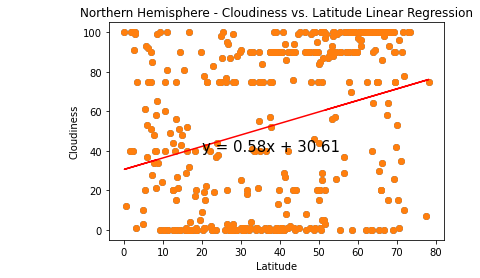

In [105]:
# Create a Scatter Plot for temperature vs latitude
x_values = Northern['Lat']
#(Celsius * 9/5) + 32
y_values = Northern['Cloudiness'] 
# Create a Scatter Plot for temperature vs latitude
plt.scatter(x_values,y_values)

# Create a Scatter Plot for temperature vs latitude
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')

plt.annotate(line_eq,(-30,30),fontsize=15 )
#call funciton linear regresion and plot vfor vendetta
linr(x_values, y_values)

## Analysis
there is a higher accumulation of clouds in the upper closer to the equator. This is due to the troppical weather.
we can obser smaller gaps beetween 20 - 60 latitude 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.034483


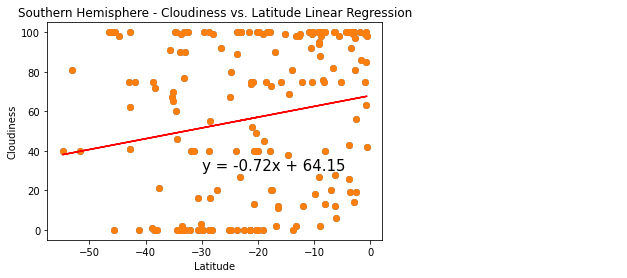

In [106]:
# Create a Scatter Plot for temperature vs latitude
x_values = Southern['Lat']
#(Celsius * 9/5) + 32
y_values = Southern['Cloudiness'] 
# Create a Scatter Plot for temperature vs latitude
plt.scatter(x_values,y_values)

# Create a Scatter Plot for temperature vs latitude
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')

plt.annotate(line_eq,(-30,30),fontsize=15 )
#call funciton linear regresion and plot vfor vendetta
linr(x_values, y_values)

## Analysis
in the southern hemisphere we can see that the  higher precentage of cloudes are closer to the equator. We can also obserbe this with the lr line. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.001538


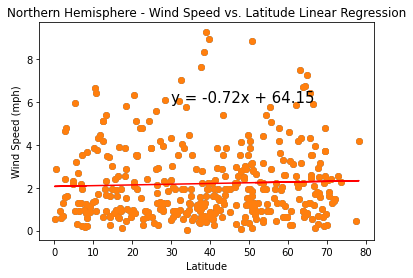

In [132]:
# Create a Scatter Plot for temperature vs latitude
x_values = Northern['Lat']
#(Celsius * 9/5) + 32
y_values = Northern['Wind Speed'] /1.609
# Create a Scatter Plot for temperature vs latitude
plt.scatter(x_values,y_values)

# Create a Scatter Plot for temperature vs latitude
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')

plt.annotate(line_eq,(30,6),fontsize=15 )
#call funciton linear regresion and plot vfor vendetta
linr(x_values, y_values)

## Analysis
The slope of windspeeds is very low. We can notice that most of the cities have an average windspeed of 1 to 4mph  and this is mostly through all of the northen hemisphere. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.026694


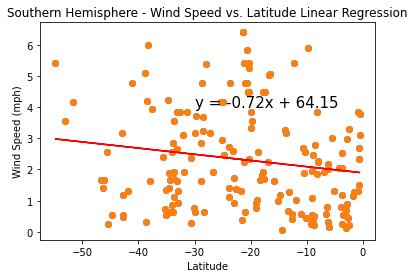

In [131]:
# Create a Scatter Plot for temperature vs latitude
x_values = Southern['Lat']
#(Celsius * 9/5) + 32
y_values = Southern['Wind Speed'] /1.609
# Create a Scatter Plot for temperature vs latitude
plt.scatter(x_values,y_values)

# Create a Scatter Plot for temperature vs latitude
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')

plt.annotate(line_eq,(-30,4),fontsize=15 )
#call funciton linear regresion and plot vfor vendetta
linr(x_values, y_values)

## Analysis
In the southern hemisphere we can see a decline the nigher winds are registering in the lower lattitude as we can see a decline in windspeed as we reach the equator.

Through out the charts we can see that an accumulation of clouds and humiddity happens center to the equator. this is also the reason why there is so much vegetation in this area. Higher wind speeds happen as it starts to move outside of the equator. We could see a good coorelation of huracanes and that traverse upward from the equator north and south as the higher the temperature the greater the risk of humidity. 

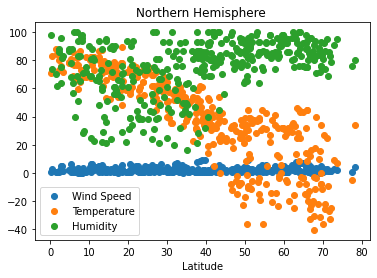

In [141]:
x_values = Northern['Lat']
#(Celsius * 9/5) + 32
y_values_W = Northern['Wind Speed'] /1.609
y_values_T = (Northern['Max Temp'] *9/5)+32
y_values_H = Northern['Humidity'] 
# Create a Scatter Plot for temperature vs latitude
plt.scatter(x_values,y_values_W )
plt.scatter(x_values,y_values_T )
plt.scatter(x_values,y_values_H )
# Create a Scatter Plot for temperature vs latitude
plt.xlabel('Latitude')
plt.ylabel('')
plt.title('Northern Hemisphere ')
plt.legend(['Wind Speed', 'Temperature', 'Humidity'])
#plt.annotate(line_eq,(-30,4),fontsize=15 )
#call funciton linear regresion and plot vfor vendetta
#linr(x_values, y_values_W)
plt.show()


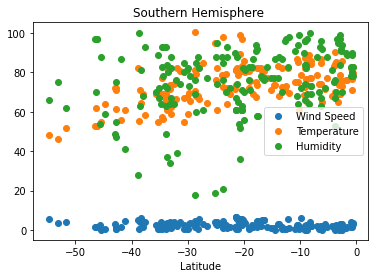

In [140]:
x_values = Southern['Lat']
#(Celsius * 9/5) + 32
y_values_W = Southern['Wind Speed'] /1.609
y_values_T = (Southern['Max Temp'] *9/5)+32
y_values_H = Southern['Humidity'] 
# Create a Scatter Plot for temperature vs latitude
plt.scatter(x_values,y_values_W )
plt.scatter(x_values,y_values_T )
plt.scatter(x_values,y_values_H )
# Create a Scatter Plot for temperature vs latitude
plt.xlabel('Latitude')
plt.ylabel('')
plt.title('Southern Hemisphere ')
plt.legend(['Wind Speed', 'Temperature', 'Humidity'])
#plt.annotate(line_eq,(-30,4),fontsize=15 )
#call funciton linear regresion and plot vfor vendetta
#linr(x_values, y_values_W)
plt.show()


In this chart for the southern hemisphere we notice the inverse the farther away from the equator lower temperatures, lower humidity but an increase of wind speed.